<a href="https://colab.research.google.com/github/ammarshibani/data-analysis-colab/blob/main/StudentPerformanceFactors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check data types
print("\nData types of each column:")
print(df.dtypes)

Missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Data types of each column:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivatio

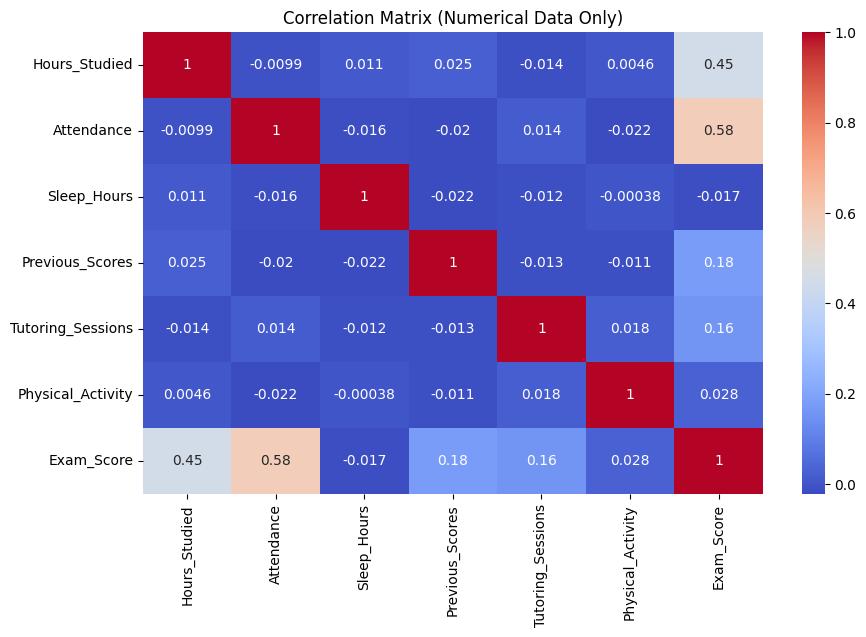

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numeric data
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Data Only)")
plt.show()

# New Section

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Define your feature variables (X) and target variable (y)
X = df.drop('Exam_Score', axis=1)  # Replace 'target_column' with the actual target column
y = df['Exam_Score']  # Target column

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in X
for col in X.columns:
    # If the column contains string values
    if X[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.19717599596570853

Classification Report:
               precision    recall  f1-score   support

          55       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         5
          59       0.09      0.11      0.10         9
          60       0.12      0.10      0.11        21
          61       0.15      0.21      0.18        42
          62       0.15      0.14      0.14        80
          63       0.15      0.14      0.14       111
          64       0.16      0.18      0.17       152
          65       0.26      0.22      0.24       227
          66       0.20      0.22      0.21       227
          67       0.20      0.21      0.21       202
          68       0.24      0.25      0.24       230
          69       0.22      0.23      0.23       176
          70       0.16      0.15      0.15       164
          71       0.17      0.15      0.16       123
          72       0.31   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X = pd.get_dummies(X, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the distribution of classes
class_counts = y.value_counts()
print("Class distribution before SMOTE:\n", class_counts)

# Remove classes with very few samples (e.g., keep classes with at least 10 samples)
min_samples = 10
classes_to_keep = class_counts[class_counts >= min_samples].index
mask = y.isin(classes_to_keep)

X_filtered = X_scaled[mask]
y_filtered = y[mask]

# Handling class imbalance using regular SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize Random Forest with class weighting
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Class distribution before SMOTE:
 Exam_Score
68     759
66     751
67     717
65     679
69     624
70     542
64     501
71     408
63     371
72     304
62     264
61     171
73     141
74     106
60      77
75      48
59      40
58      22
76      16
80       5
77       5
57       4
82       4
94       4
86       4
78       4
84       3
97       3
89       3
79       3
88       3
98       3
93       2
92       2
95       2
99       2
87       2
96       1
85       1
91       1
100      1
83       1
101      1
55       1
56       1
Name: count, dtype: int64
Accuracy: 0.718049456898544

Classification Report:
               precision    recall  f1-score   support

          58       1.00      1.00      1.00       210
          59       1.00      1.00      1.00       244
          60       0.96      0.99      0.97       238
          61       0.91      0.96      0.93       232
          62       0.85      0.80      0.83       240
          63       0.73      0.78      0.75       227
  

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Define your feature variables (X) and target variable (y)
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the distribution of classes
class_counts = y.value_counts()
print("Class distribution before SMOTE:\n", class_counts)

# Remove classes with very few samples (e.g., keep classes with at least 10 samples)
min_samples = 10
classes_to_keep = class_counts[class_counts >= min_samples].index
mask = y.isin(classes_to_keep)

X_filtered = X_scaled[mask]
y_filtered = y[mask]

# Handling class imbalance using regular SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize Random Forest with class weighting
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Class distribution before SMOTE:
 Exam_Score
68     759
66     751
67     717
65     679
69     624
70     542
64     501
71     408
63     371
72     304
62     264
61     171
73     141
74     106
60      77
75      48
59      40
58      22
76      16
80       5
77       5
57       4
82       4
94       4
86       4
78       4
84       3
97       3
89       3
79       3
88       3
98       3
93       2
92       2
95       2
99       2
87       2
96       1
85       1
91       1
100      1
83       1
101      1
55       1
56       1
Name: count, dtype: int64
Accuracy: 0.718049456898544

Classification Report:
               precision    recall  f1-score   support

          58       1.00      1.00      1.00       210
          59       1.00      1.00      1.00       244
          60       0.96      0.99      0.97       238
          61       0.91      0.96      0.93       232
          62       0.85      0.80      0.83       240
          63       0.73      0.78      0.75       227
  

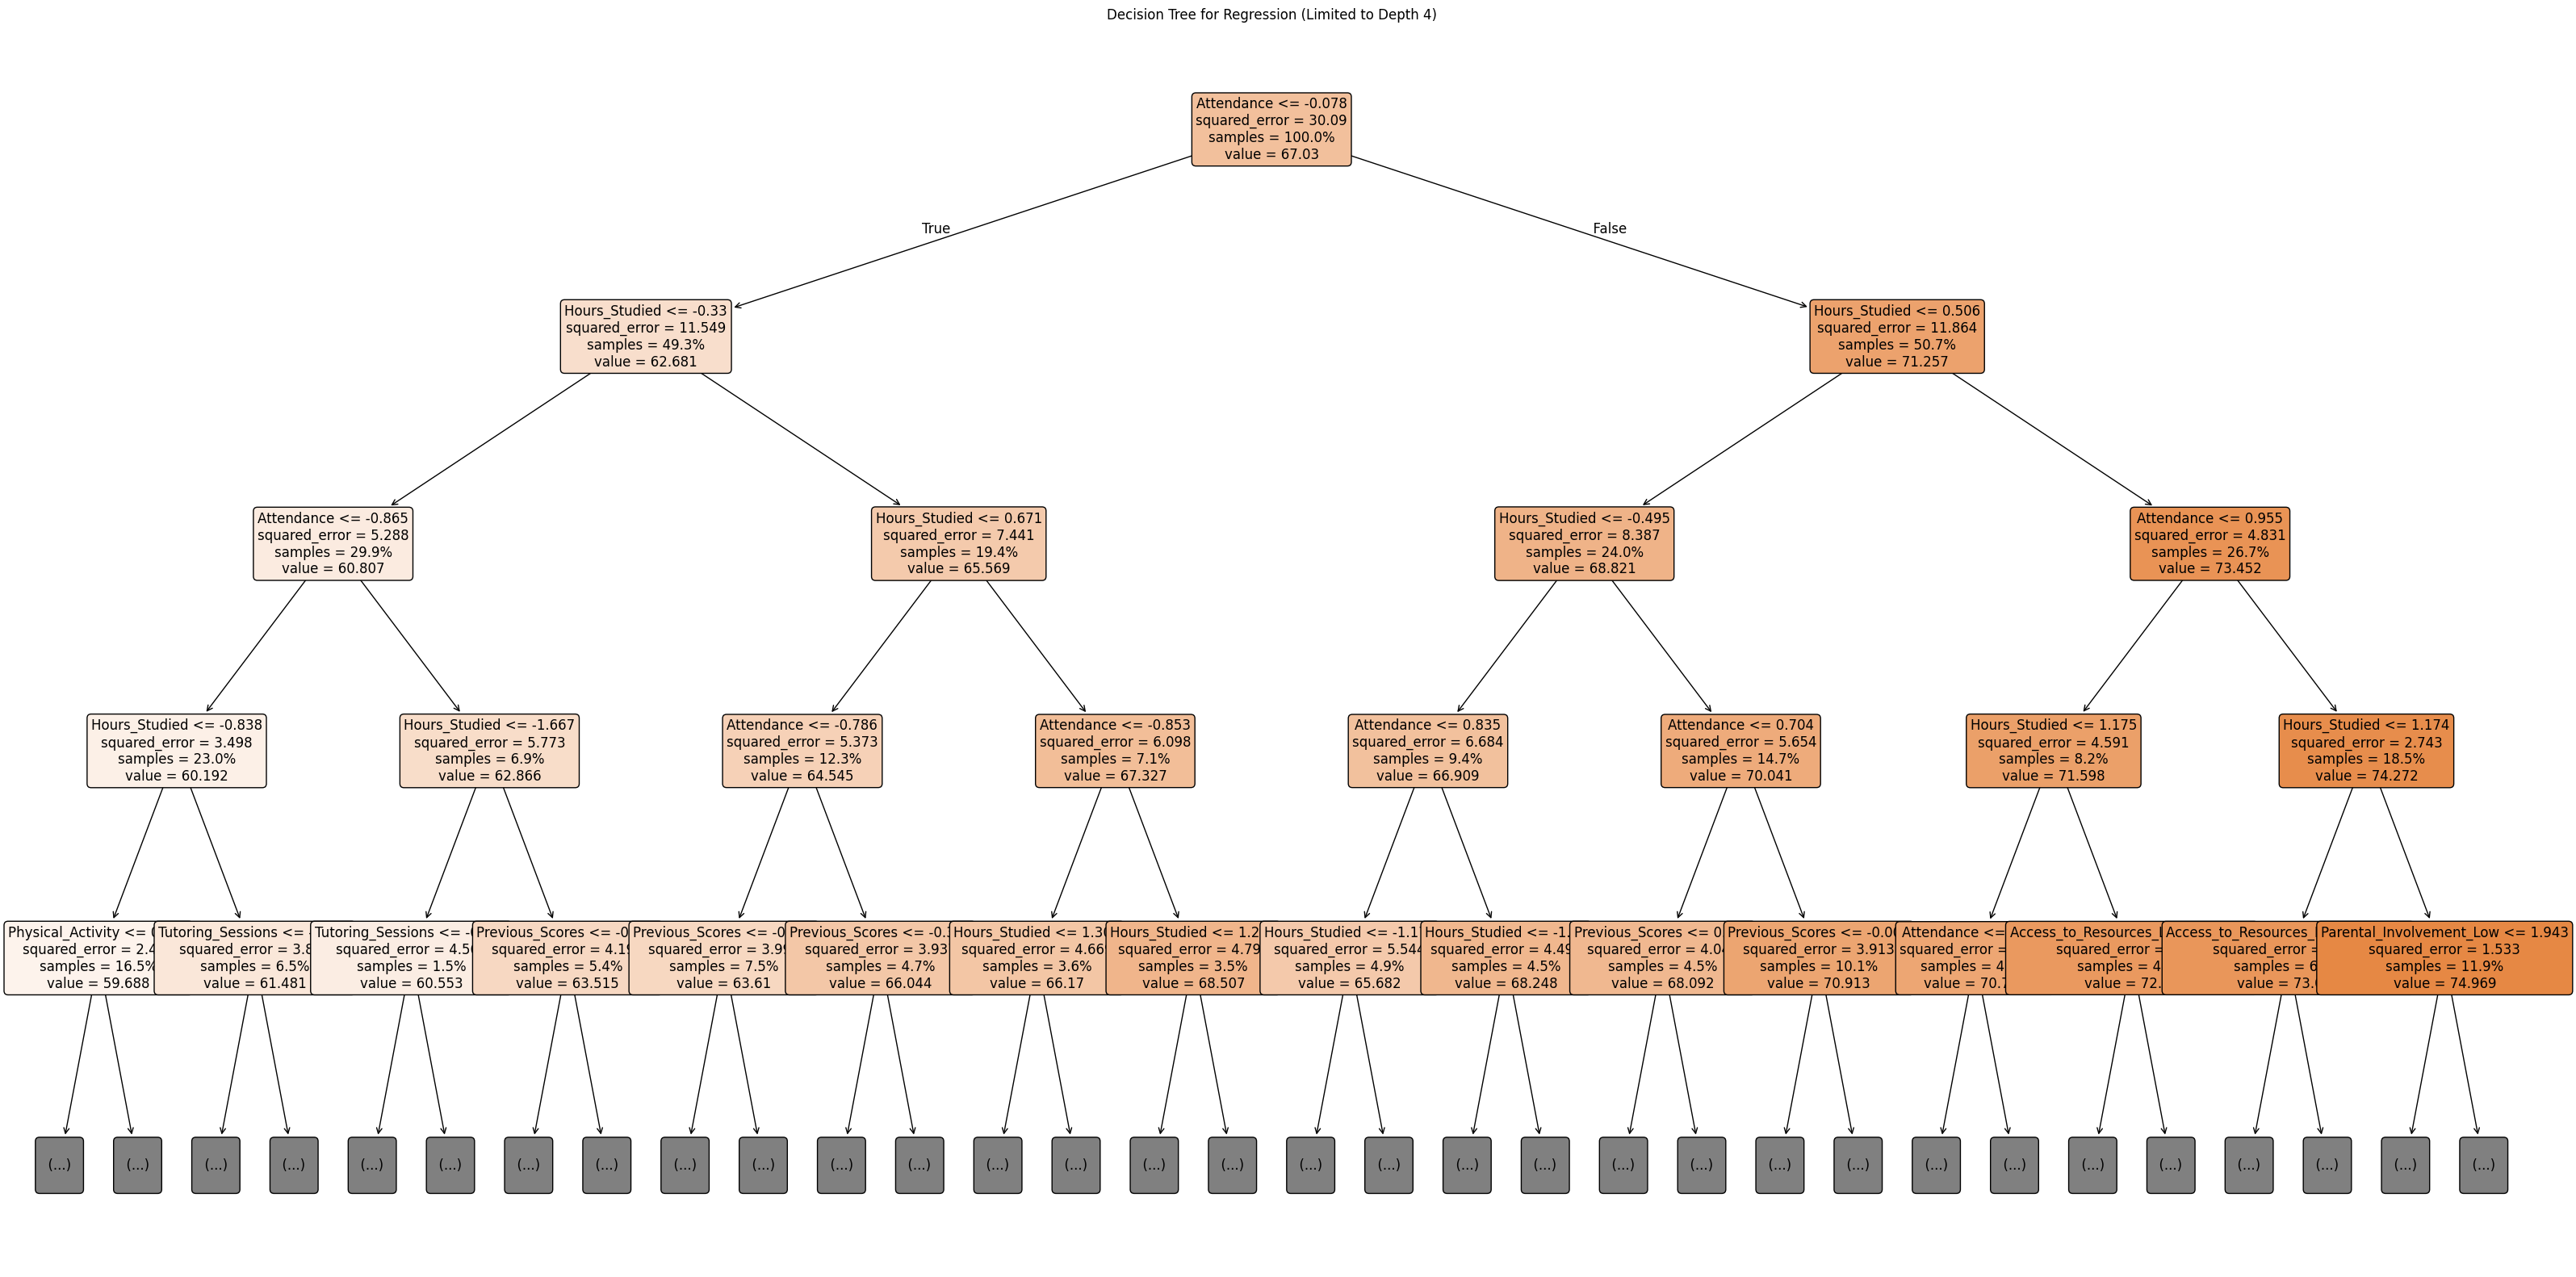

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Train the model (ensure X_train and y_train are your actual training data)
regressor.fit(X_train, y_train)

# Increase the figure size drastically
plt.figure(figsize=(40, 20))  # Drastically increase the figure size for large trees

# Limit the tree depth for better readability
tree.plot_tree(regressor,
               max_depth=4,  # Limit to 4 levels of depth
               filled=True,
               feature_names=X.columns,
               rounded=True,
               fontsize=12,  # Adjust fontsize for better visibility
               proportion=True)

plt.title("Decision Tree for Regression (Limited to Depth 4)")
plt.show()
